<a href="https://colab.research.google.com/github/AlexisSamboy/alexissamboy-data-portafolio/blob/main/proyectos/python/01_perfil_cliente_bancario/notebook/01_limpieza_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**📊 Proyecto de Limpieza y Análisis Exploratorio de Datos (EDA)**

*por Alexis Samboy — Data Analyst in Progress*

El presente proyecto tiene como finalidad realizar un proceso completo de limpieza y análisis exploratorio de un conjunto de datos, aplicando conceptos esenciales del análisis de datos con Python. A través de herramientas como pandas, seaborn y matplotlib, se llevará a cabo la depuración del dataset, la identificación de valores faltantes o atípicos y la elaboración de visualizaciones iniciales.

Este trabajo forma parte de mi desarrollo profesional como analista de datos, con el objetivo de fortalecer mis habilidades técnicas y adquirir experiencia práctica en la preparación de datos para futuros análisis más avanzados.

Datos del autor

***👤 Nombre: Alexis V. Samboy Herrera***

**💼 LinkedIn:** https://www.linkedin.com/in/alexis-samboy-herrera/

**📂 GitHub:** https://github.com/AlexisSamboy

***SOBRE EL DATA SET:***

El dataSet fue obtenido de la fuente Kaggle.

***El problema del Negocio:*** Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.


```
¿Qué perfil tienen los clientes con mayor potencial de conversión?
```
La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:



1.  "age": edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


In [2]:
# Empezaremos a importar nuestras librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/content/dataset_banco.csv"
data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [18]:
print(data.shape)

(45215, 17)


Aqui confirmamos las cantidad de registros del Data Set , Podemos ver que existen 45,215 filas y 17 columnas.

In [19]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


Con esta funcion podemos ver una vista previa de los datos. Podemos ver como estan estructurados los datos y comenzar a analizar cuales variables serian utiles para el analisis que vamos a realizar.

In [20]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


**Observacion:** Las variables {"age", "balance", "day", "duration", "campaign", "pdays", "previous"} son variables numericas las cuales facilita la aplicacion de funciones estadisticas, mientras las variables {"job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"} son variables categoricas y hay que aplicar cierto analisis para extraer el informacion valiosa para este analisis.

# **Limpiezas de los Datos**

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

* Datos faltantes en algunas celdas.

* Columnas irrelevantes (que no responden al problema que queremos resolver)

* Registros (filas) repetidos

* Valores extremos (outliers) en el caso de las variables numéricas.
Se deben analizar en detalle pues no necesariamente la solución es eliminarlos

* Errores tipográficos en el caso de las variables categóricas.

Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Podemos Observar que existen algunos **registros faltantes**, podemos realizar dos acciones rellenar esos espacios en blanco utilizando *valores unicos* o *valores calculados* utilizando la funcion **.fillna()** O podemos simplemente eliminar esos registros si nuestro dataframe es grande con suficientes registros para realizar nuestro analisis, la funcion a utilizar es **.dropna()** .

In [22]:
#Con esta funcion eliminamos los datos faltantes
data.dropna(inplace=True)

#Volvemos a imprimir los detalles del data set y confirmar que no existan datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Observamos que la columna "Non-Null count" todas las variables tiene 45,207 datos registrados, por lo tanto ya no existe datos nulos.

Para nuestro analisis existen columnas las cuales no son relevantes, por lo tanto nuestro proximo paso es eliminar esos datos o columnas irrelevantes para nuestro analisis.

***Una columna irrelevante puede ser:***

* Una columna que no contiene información relevante para el
problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)

* Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".

* Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.

* Columnas con información redundante. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [23]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


***Observacion:*** Todas las columna poseen mas de dos categorias.

Ahora vamos analizar las columnas numericas. Con la funcion .describe() podemos obtener estadisticas basicas de los datos numericos y tratar de extraer informacion de manera superficial.

In [24]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


A primera vista el comando nos muestras estadisticas basicas como "Mean" que es el promedio de los datos, "Std" que es la desviacion estandar y medidas como "Min" y "Max" que son minimos y maximos respectivamente, adicional a esto muestra algunos percentiles que dependiendo el enfoque del analisis podria ser informacion muy util. En este caso solo observare "Std" para verificar si existen datos iguales en este set de datos, todos los datos son diferente porque su desviacion es diferente a Cero (0).

# **Filas repetidas**

Vamos a continuar limpiando el DataFrame, ahora vamos a eliminar esos registros duplicados o iguales.


In [25]:
print(f"Cantidad de registro antes del filtro: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Cantidad de registro despues del filtro: {data.shape}")

Cantidad de registro antes del filtro: (45207, 17)
Cantidad de registro despues del filtro: (45203, 17)


***Ahora vamos a trabajar con Outliers o Valores extremos:*** Vamos a realizar un pequeno analisis para determinar si eliminamos esos registro o pueden ser registro valioso para nuestro analisis. Por ejemplo un criterio que podria utilizar para determinar si esos registros son valiosos o no, un intervalo logico edades superiores a 100 anos no son relevante para este analisis, pero saldos de cuentas superiores a la media si podrian ser importante para este analisis.

***Vamos a empezar con las variables numericas, crearemos graficas tipo "Boxplot".***

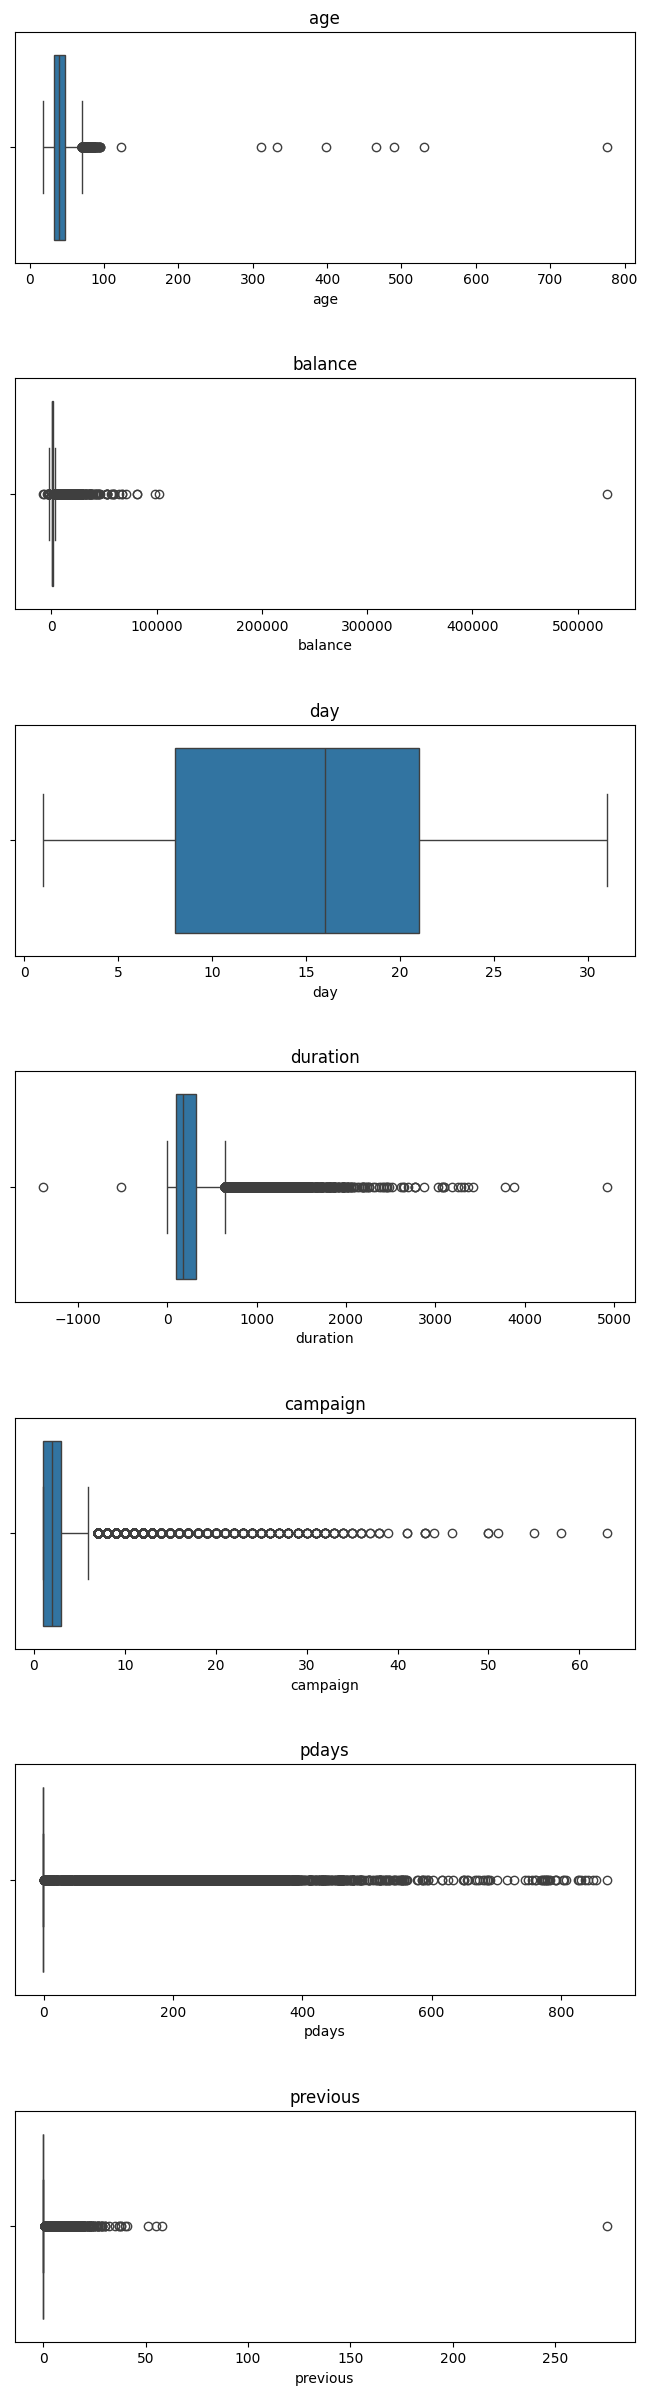

In [28]:
#Primero vamos a crear una nueva variable tipo lista con las variables numericas de nuestro DataFrame
col_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

#Creamos una figura Vacia
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

#Creamos un ciclo para crear cada una de las figuras de cada variable

for i, col in enumerate(col_num):
  sns.boxplot(data=data, x=col, ax=ax[i])
  ax[i].set_title(col)


***Observaciones:***

"age" Hay personas con edades superiores a 100 anos, esos datos no son relavantes para nuestro analisis.

"duration" la duracion de las llamada no puede ser negativa lo que me da entender que fueron registrada mal.

"previous" Hay valores extremadamente alto, eso hay que normalizarlo.

In [29]:
# Eliminar edades superiores a 100 anos
print(f"Cantidad de registro antes del filtro de edad: {data.shape}")
data=data[data['age']<=100]
print(f"Cantidad de registro despues del filtro de edad: {data.shape}")

Cantidad de registro antes del filtro de edad: (45203, 17)
Cantidad de registro despues del filtro de edad: (45195, 17)


In [33]:
# Eliminar duracion negativas
print(f"Cantidad de registro antes del filtro de duracion: {data.shape}")
data=data[data['duration']>0]
print(f"Cantidad de registro despues del filtro de duracion: {data.shape}")

Cantidad de registro antes del filtro de duracion: (45192, 17)
Cantidad de registro despues del filtro de duracion: (45189, 17)


In [34]:
# Eliminar "Previous" superiores a 100
print(f"Cantidad de registro antes del filtro de previous: {data.shape}")
data=data[data['previous']<=100]
print(f"Cantidad de registro despues del filtro de previous: {data.shape}")

Cantidad de registro antes del filtro de previous: (45189, 17)
Cantidad de registro despues del filtro de previous: (45189, 17)


# **Errores tipograficos**

Vamos eliminar esos errores tipograficos cometidos al ingresar esa informacion, la manera que lo haremos es graficando las variables categoricas con grafico Tipo "Barras" asi podemos tener un panorama mas amplio.

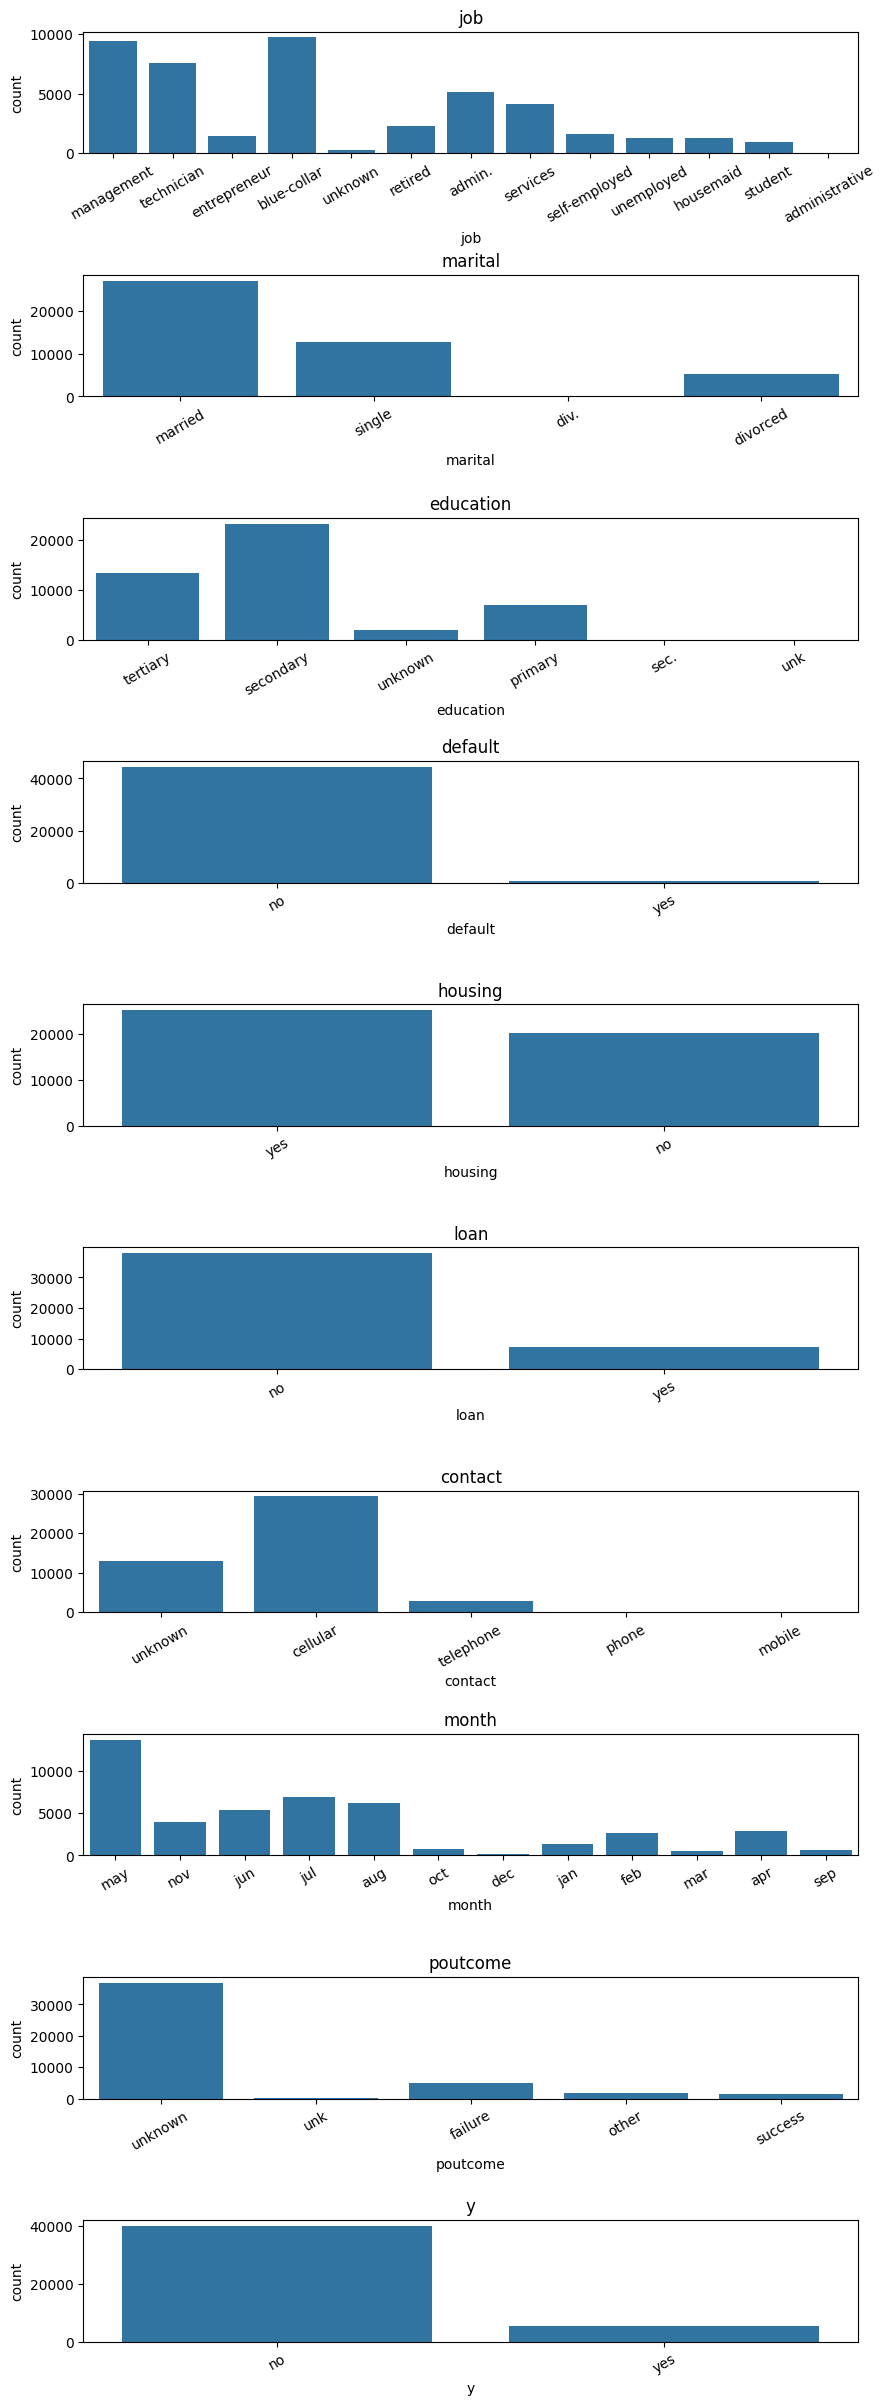

In [40]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', rotation=30);

A primera vista existen muchos errores tipo graficos, vamos a empezar a estandarizar todo a Minusculas.

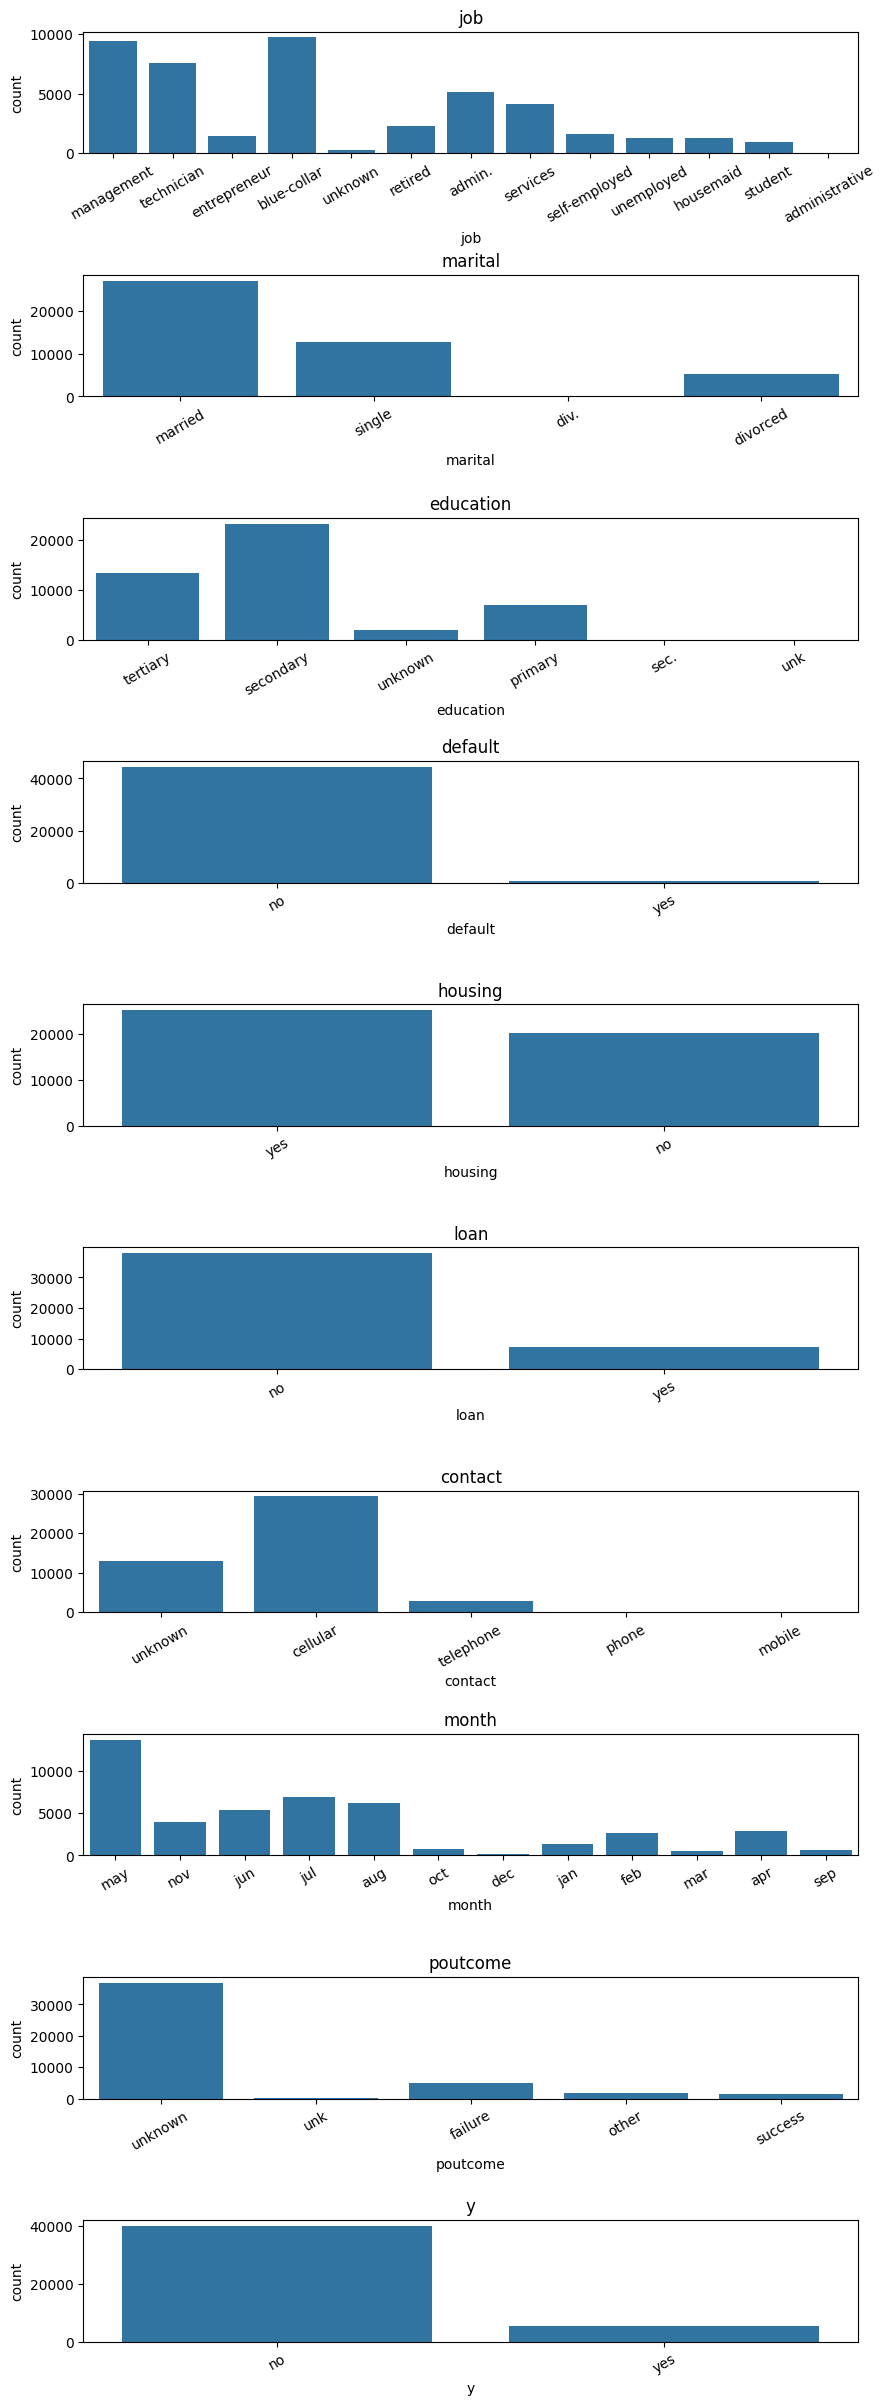

In [38]:
for column in data.columns:
    # Transformara en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Ahora vamos a volver a graficar y ver como se ven los datos

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', rotation=30);


***Vamos empezar a unificar esas cantegorias que significan lo mismo, pero estan escrita de una manera diferente.***

In [44]:
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']


In [45]:
# Unificaremos "admin." y "administrative"
data['job'] = data['job'].replace('admin.', 'administrative')
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [46]:
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced']


In [47]:
# Unificaremos "div." y "divorced"
data['marital'] = data['marital'].replace('div.', 'divorced')
print(data['marital'].unique())

['married' 'single' 'divorced']


In [48]:
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']


In [49]:
# unificaremos "unknowm" y "unk"
data['education'] = data['education'].replace('unk', 'unknown')
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.']


In [50]:
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']


In [52]:
# Unificaremos telephone, phone y cellular y mobile
print(data['contact'].unique())
data['contact'] = data['contact'].replace('cellular', 'mobile')
data['contact'] = data['contact'].replace('phone', 'telephone')
print(data['contact'].unique())

['unknown' 'mobile' 'phone']
['unknown' 'mobile' 'telephone']


In [53]:
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']


In [54]:
# Unificaremos unk y unknown
print(data['poutcome'].unique())
data['poutcome'] = data['poutcome'].replace('unk', 'unknown')
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [55]:
data.shape

(45189, 17)

***Limpieza completa***

Ya conclui con la limpieza de los datos que inicialmente eran 45,215 registros con 17 columnas o variables (45215, 17), ahora existen 45,189 registros y la misma cantidad de columnas.

Luego de este enriquesida limpieza y transformacion de los datos solo nos queda exportar ese set de datos limpios y continuar con el analisis exploratorio.

In [58]:
ruta_exportacion= "/content/data-clean/data_clean_publicidad.csv"

data.to_csv(ruta_exportacion, index=False)